In [ ]:
import math
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime as dt

from collections import defaultdict
from dataclasses import dataclass
from enum import Enum
from functools import reduce
from itertools import chain
from multiprocessing import Pool
from typing import Any, List, TypeVar, Generic
from tqdm import tqdm

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'

In [ ]:
df = pd.read_csv('/Users/david/Dropbox/courses/apmth207/project/data/1733005191.csv')

<Figure size 32000x2000 with 0 Axes>

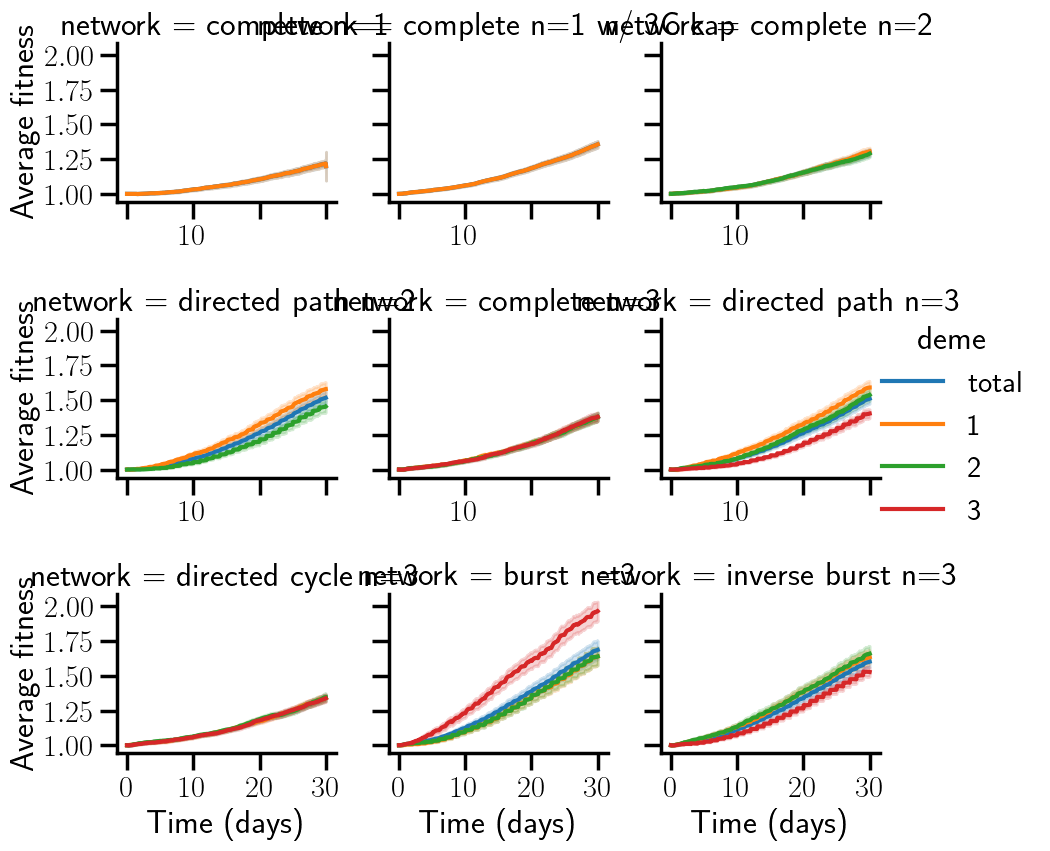

<Figure size 32000x2000 with 0 Axes>

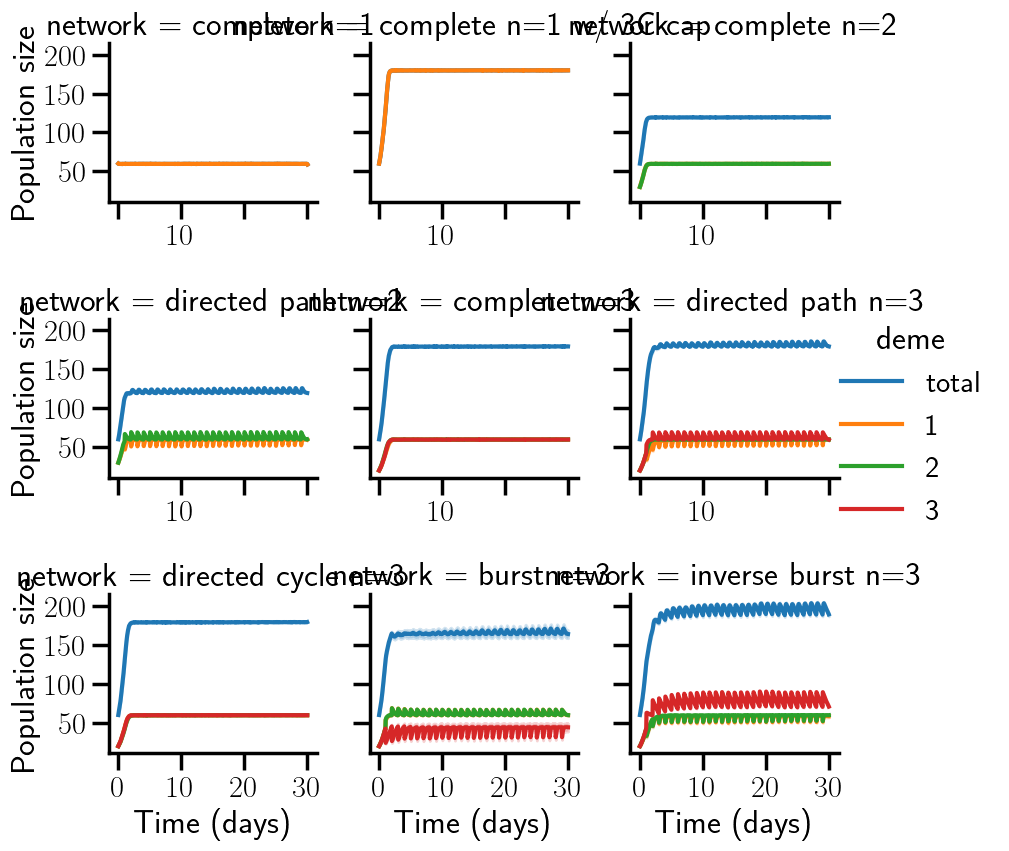

In [ ]:
with sns.plotting_context("poster"):
  WIDTH = 40 * 8
  plt.figure(figsize=(WIDTH, 20))
  g = sns.FacetGrid(df, col="network", hue='deme', palette='tab10', hue_order=['total', '1', '2', '3'], col_wrap=3)
  g.map(sns.lineplot, "time_d", "average_fitness")
  g.add_legend()
  _ = g.set_axis_labels("Time (days)", "Average fitness")
  g.figure.savefig('/Users/david/Dropbox/courses/apmth207/project/plots/average-fitness-poster.png', dpi=300, bbox_inches='tight')

  plt.figure(figsize=(WIDTH, 20))
  g = sns.FacetGrid(df, col="network", hue='deme', palette='tab10', hue_order=['total', '1', '2', '3'], col_wrap=3)
  g.map(sns.lineplot, "time_d", "population_size")
  g.add_legend()
  _ = g.set_axis_labels("Time (days)", "Population size")
  g.figure.savefig('/Users/david/Dropbox/courses/apmth207/project/plots/population-size-poster.png', dpi=300, bbox_inches='tight')

In [ ]:
h = sns.FacetGrid(df[df['time_d'] == 10], col="network", hue='deme', row='deme', palette='tab10', hue_order=['total', '1', '2', '3'])
h.map(sns.histplot, "average_fitness")

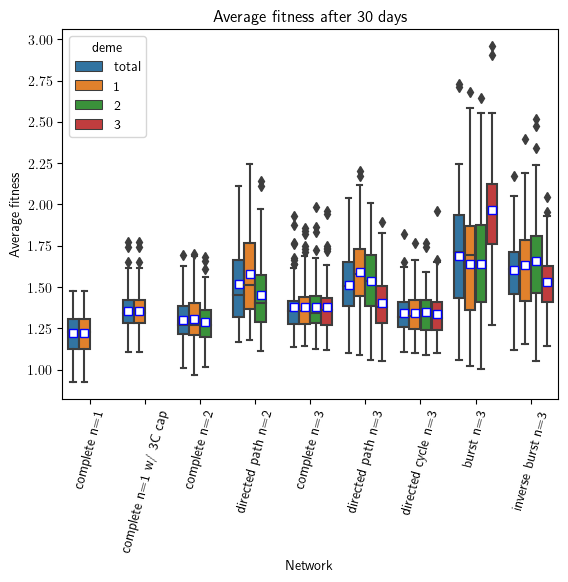

In [ ]:
b = sns.boxplot(
  data=df[df['time_d'] == 30],
  x="network",
  y="average_fitness",
  hue='deme',
  hue_order=['total', '1', '2', '3'],
  showmeans=True,
  meanprops={
    "marker": "s",
    "markerfacecolor":"white",
    "markeredgecolor":"blue",
  },
)
b.xaxis.set_tick_params(rotation=75)
b.set(xlabel='Network', ylabel='Average fitness', title=f'Average fitness after 30 days')
b.figure.savefig('/Users/david/Dropbox/courses/apmth207/project/plots/boxplot.png', dpi=300, bbox_inches='tight')

In [ ]:
std_fitness_table = df[df['time_d'] == 30].groupby(['network', 'deme'])['average_fitness'].std(ddof=0).unstack()
std_fitness_table

deme,1,2,3,total
network,,,,
burst n=3,0.328944,0.322634,0.306369,0.346006
complete n=1,0.119105,NaN,NaN,0.119105
complete n=1 w/ 3C cap,0.119487,NaN,NaN,0.119487
complete n=2,0.138473,0.133583,NaN,0.129698
complete n=3,0.151119,0.152309,0.156033,0.147125
directed cycle n=3,0.126604,0.137329,0.137968,0.125176
directed path n=2,0.245572,0.218680,NaN,0.227184
directed path n=3,0.231998,0.205620,0.162885,0.190515
inverse burst n=3,0.255504,0.273398,0.172852,0.188979


In [ ]:
average_fitness_table = df[df['time_d'] == 30].groupby(['network', 'deme'])['average_fitness'].mean().unstack()
average_fitness_table

deme,1,2,3,total
network,,,,
burst n=3,1.639130,1.638963,1.964288,1.686310
complete n=1,1.218460,NaN,NaN,1.218460
complete n=1 w/ 3C cap,1.356154,NaN,NaN,1.356154
complete n=2,1.305456,1.289783,NaN,1.297587
complete n=3,1.376940,1.377359,1.378517,1.377610
directed cycle n=3,1.339949,1.346107,1.337709,1.341262
directed path n=2,1.579193,1.453371,NaN,1.516229
directed path n=3,1.590633,1.536477,1.403182,1.510177
inverse burst n=3,1.633945,1.658724,1.527535,1.601588


In [ ]:
midf = pd.read_csv('/Users/david/Dropbox/courses/apmth207/project/data/mi-1733009751.csv')

[Text(0.5, 0, 'Network'),
 Text(0, 0.5, 'Average fitness'),
 Text(0.5, 1.0, 'Average fitness after 30 days')]

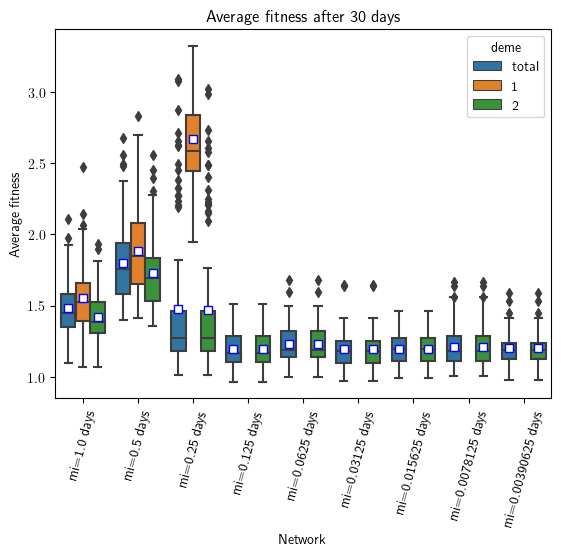

In [ ]:
b = sns.boxplot(
  data=midf[midf['time_d'] == 30],
  x="network",
  y="average_fitness",
  hue='deme',
  hue_order=['total', '1', '2'],
  showmeans=True,
  meanprops={
    "marker": "s",
    "markerfacecolor":"white",
    "markeredgecolor":"blue",
  },
)
b.xaxis.set_tick_params(rotation=75)
b.set(xlabel='Network', ylabel='Average fitness', title=f'Average fitness after 30 days')

In [ ]:
madf = pd.read_csv('/Users/david/Dropbox/courses/apmth207/project/data/ma-1733010315.csv')

[Text(0.5, 0, 'Network'),
 Text(0, 0.5, 'Average fitness'),
 Text(0.5, 1.0, 'Average fitness after 30 days')]

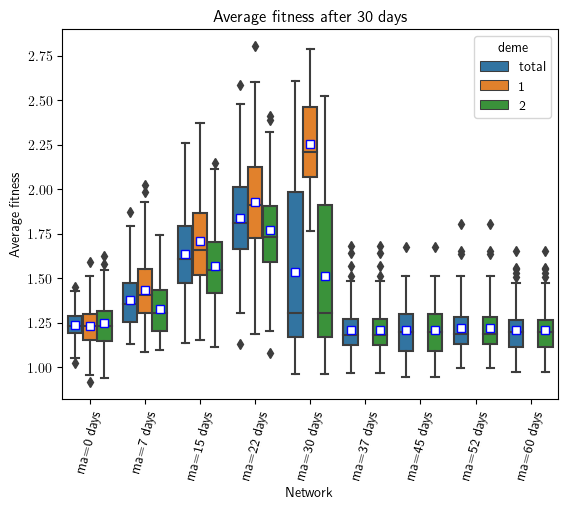

In [ ]:
b = sns.boxplot(
  data=madf[madf['time_d'] == 30],
  x="network",
  y="average_fitness",
  hue='deme',
  hue_order=['total', '1', '2'],
  showmeans=True,
  meanprops={
    "marker": "s",
    "markerfacecolor":"white",
    "markeredgecolor":"blue",
  },
)
b.xaxis.set_tick_params(rotation=75)
b.set(xlabel='Network', ylabel='Average fitness', title=f'Average fitness after 30 days')

In [ ]:
madf[madf['time_d'] == 30].groupby(['network', 'deme'])['population_size'].mean().unstack()

deme,1,2,total
network,,,
ma=0 days,59.73,59.80,119.53
ma=15 days,59.88,61.51,121.39
ma=22 days,59.90,76.98,136.88
ma=30 days,19.80,74.97,94.77
ma=37 days,0.00,59.69,59.69
ma=45 days,0.00,59.72,59.72
ma=52 days,0.00,59.79,59.79
ma=60 days,0.00,59.69,59.69
ma=7 days,59.84,59.82,119.66


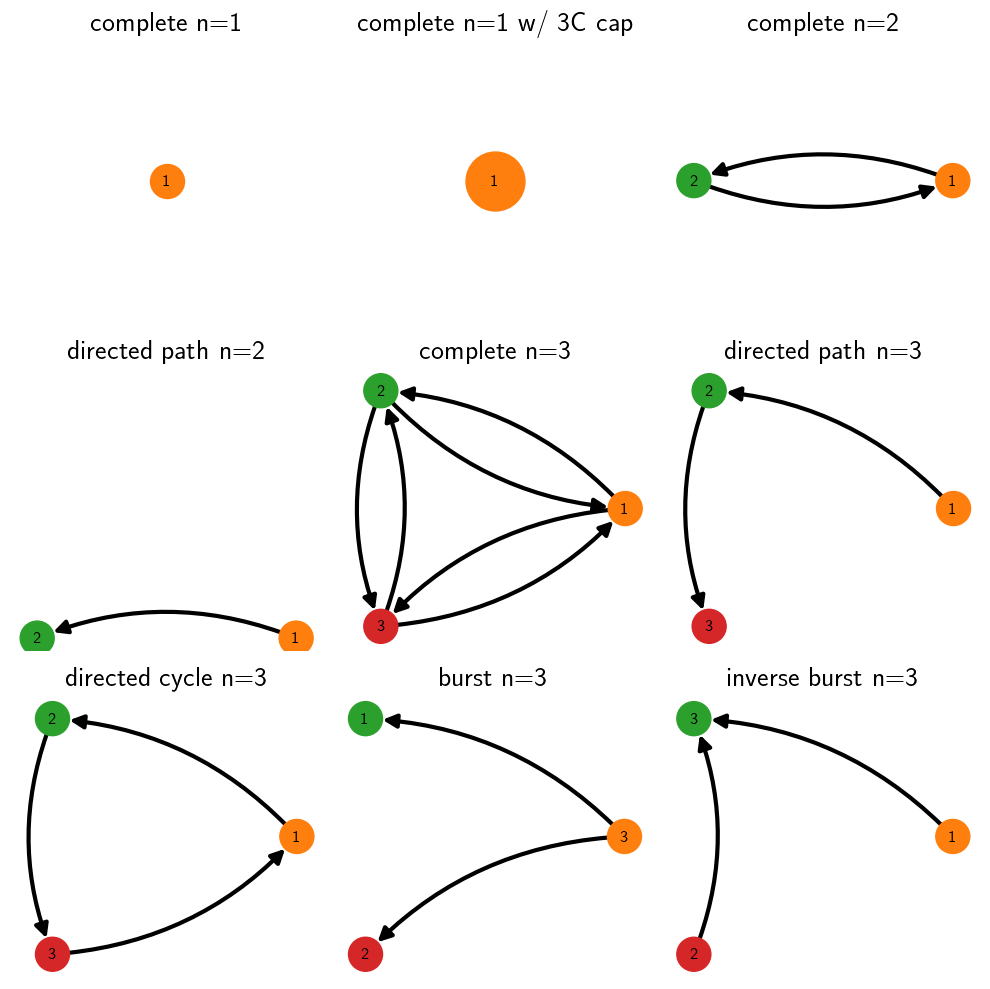

In [ ]:
df_dicts = [
  (
    nx.complete_graph(['1']),
    C,
  ),
  (
    nx.complete_graph(['1']),
    3*C,
  ),
  (
    nx.from_edgelist([('1', '2'), ('2', '1')], create_using=nx.DiGraph),
    C,
  ),
  (
    nx.from_edgelist([('1', '2')], create_using=nx.DiGraph),
    C,
  ),
  (
    nx.from_edgelist([('1', '2'), ('2', '1'), ('2', '3'), ('3', '2'), ('3', '1'), ('1', '3')], create_using=nx.DiGraph),
    C,
  ),
  (
    nx.from_edgelist([('1', '2'), ('2', '3')], create_using=nx.DiGraph),
    C,
  ),
  (
    nx.from_edgelist([('1', '2'), ('2', '3'), ('3', '1')], create_using=nx.DiGraph),
    C,
  ),
  (
    nx.from_edgelist([('3', '1'), ('3', '2')], create_using=nx.DiGraph),
    C,
  ),
  (
    nx.from_edgelist([('1', '3'), ('2', '3')], create_using=nx.DiGraph),
    C,
  ),
]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

colors = sns.color_palette("tab10")
for i, ((G, C), network) in enumerate(zip(df_dicts, ['complete n=1', 'complete n=1 w/ 3C cap', 'complete n=2', 'directed path n=2', 'complete n=3', 'directed path n=3', 'directed cycle n=3', 'burst n=3', 'inverse burst n=3'])):
  ax = axes.flatten()[i]
  nx.draw(G, ax=ax, with_labels=True, node_color=colors[1:len(G)+1], width=3, node_size=C*10, pos=nx.circular_layout(G), arrowsize=20, arrows=True, connectionstyle="arc3,rad=0.2")
  ax.set_title(network, fontsize=20)

# Adjust layout
plt.savefig('/Users/david/Dropbox/courses/apmth207/project/plots/networks.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
